<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
235/235 [==============================] - 3s 10ms/step - loss: 0.2777 - val_loss: 0.1929
Epoch 2/30
235/235 [==============================] - 2s 9ms/step - loss: 0.1726 - val_loss: 0.1548
Epoch 3/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1452 - val_loss: 0.1339
Epoch 4/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1286 - val_loss: 0.1216
Epoch 5/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1185 - val_loss: 0.1134
Epoch 6/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1117 - val_loss: 0.1077
Epoch 7/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1066 - val_loss: 0.1032
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1027 - val_loss: 0.0999
Epoch 9/30
235/235 [==============================] - 3s 15ms/step - loss: 0.0999 - val_loss: 0.0976
Epoch 10/30
235/235 [==============================] - 2s 10ms/step - loss: 0.0979 - val_los

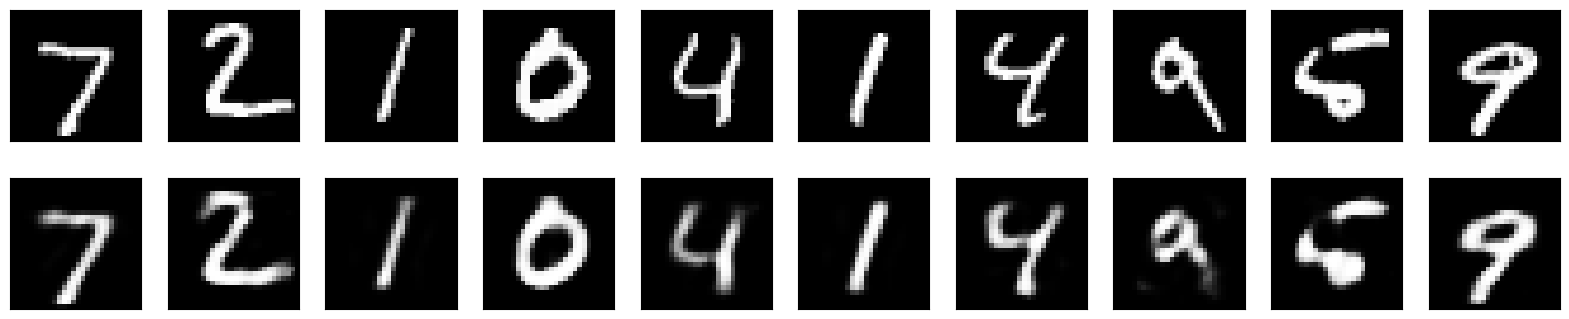

In [ ]:
#13.2.1 오토인코더란, 교과서 13장

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

input_image = tf.keras.layers.Input(shape=(784,))
encoded_input = tf.keras.layers.Dense(32, activation='relu')(input_image)
decoded_output = tf.keras.layers.Dense(784, activation='sigmoid')(encoded_input)
autoencoder = tf.keras.models.Model(input_image, decoded_output)

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

autoencoder.fit(
    X_train,
    X_train,
    epochs = 30,
    batch_size = 256,
    shuffle = True,
    validation_data = (X_test, X_test))

reconstructed_img = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

